## <사회적 약자와 관련 시설에 대한 데이터 분석> 프로젝트 소개
### 사회적 약자란?
사회적, 경제적, 신체적, 정신적 이유로 인해 불리한 위치에 있는 사람들을 사회적 약자라고 한다. 

### 배경
우리 사회를 구성하는 사회적 약자들은 고령화나 저출산 등을 비롯한 현대의 빠른 인구 변화로 계속해서 그 비중이 변하고 있다. 우리 사회를 구성하는 일부인 그들의 정확한 구성에 대해 파악해야 한다. 그리고 과연 이와 관련된 시설이 전체적으로나 지역적으로 인구 구성에 맞게 구성되었는지에 데이터 분석을 통해 실태를 밝힌다.

### 목표
우리의 목표는 사회적 약자 중 어린이, 노인, 장애인이 총인구에서 차지하는 비율과 지역별 비중을 살펴보고 연관한 복지 시설 비중, 지역별 수요 및 공급 현황을 분석하고 matplotlib의 다양한 차트를 통해 실태를 파악한다. 


### 라이브러리 및 한글 폰트 설정

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rc('axes', unicode_minus=False)
plt.rcParams['axes.unicode_minus'] = False

### 지난 10년간 인구 변화 추세선

In [87]:
import csv

years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


child = []
old = []
handicap = []
all = []

with open('../데이터/1996~2023연령별_인구변화_전체.csv', 'r', encoding='euc-kr') as f:
    data = csv.reader(f)

    next(data)
    
    # 전체 인구 데이터 처리
    for row in data:
        if row[0] == '전국' and row[1] == '계':
            all_change = row[-11:]  # 마지막 10년
            all.extend(all_change)
            


with open('../데이터/1996~2023연령별_인구변화_전체.csv', 'r', encoding='euc-kr') as f:
    data = csv.reader(f)
    next(data)  # 헤더 건너뛰기
    next(data)  # 합계 행 건너뛰기
    
    age_0_to_5_rows = [row for row in data if row[1] in ['0세', '1세', '2세', '3세', '4세', '5세']]
    
    # 연도별 합산
    child = [
        sum(int(row[i]) for row in age_0_to_5_rows) for i in range(-11, 0)
    ]
    
with open('../데이터/1996~2023연령별_인구변화_전체.csv', 'r', encoding='euc-kr') as f:
    data = csv.reader(f)
    next(data)  # 헤더 건너뛰기
    next(data)
    
    data = list(data)
    
    # 각 행의 길이를 확인해서 65세 이상의 데이터가 있는지 확인 후 합산
    for row in data:
        if row[0] == '전국':
            selected_ages_data = data[65:]
            # 65세부터 100세까지의 인구 합산, 행의 길이를 확인하여 안전하게 인덱스를 설정
            old_population_change = sum(int(row[i]) for i in range(68, min(len(row), 103)))  # 65세 이상 인구 합산
            old.append(old_population_change)

            
with open('../데이터/장애인_인구_시군구별.csv', 'r', encoding='euc-kr') as f:
    data = csv.reader(f)

    next(data)

    for row in data:
        if row[0] == '전국':
            handicap_change = row[7:]
            handicap.extend(handicap_change)
            

all = [int(x) for x in all]
handicap = [int(x) for x in handicap]
print("전체 인구", all)
print("어린이 ", child)
print("노인 ", old)
print("장애인 ", handicap)

전체 인구 [51141463, 51327916, 51529338, 51696216, 51778544, 51826059, 51849861, 51829023, 51638809, 51439038, 51325329]
어린이  [5538510, 5483670, 5479802, 5360176, 5137032, 4830698, 4571210, 4242780, 3886416, 3583576, 3336586]
노인  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

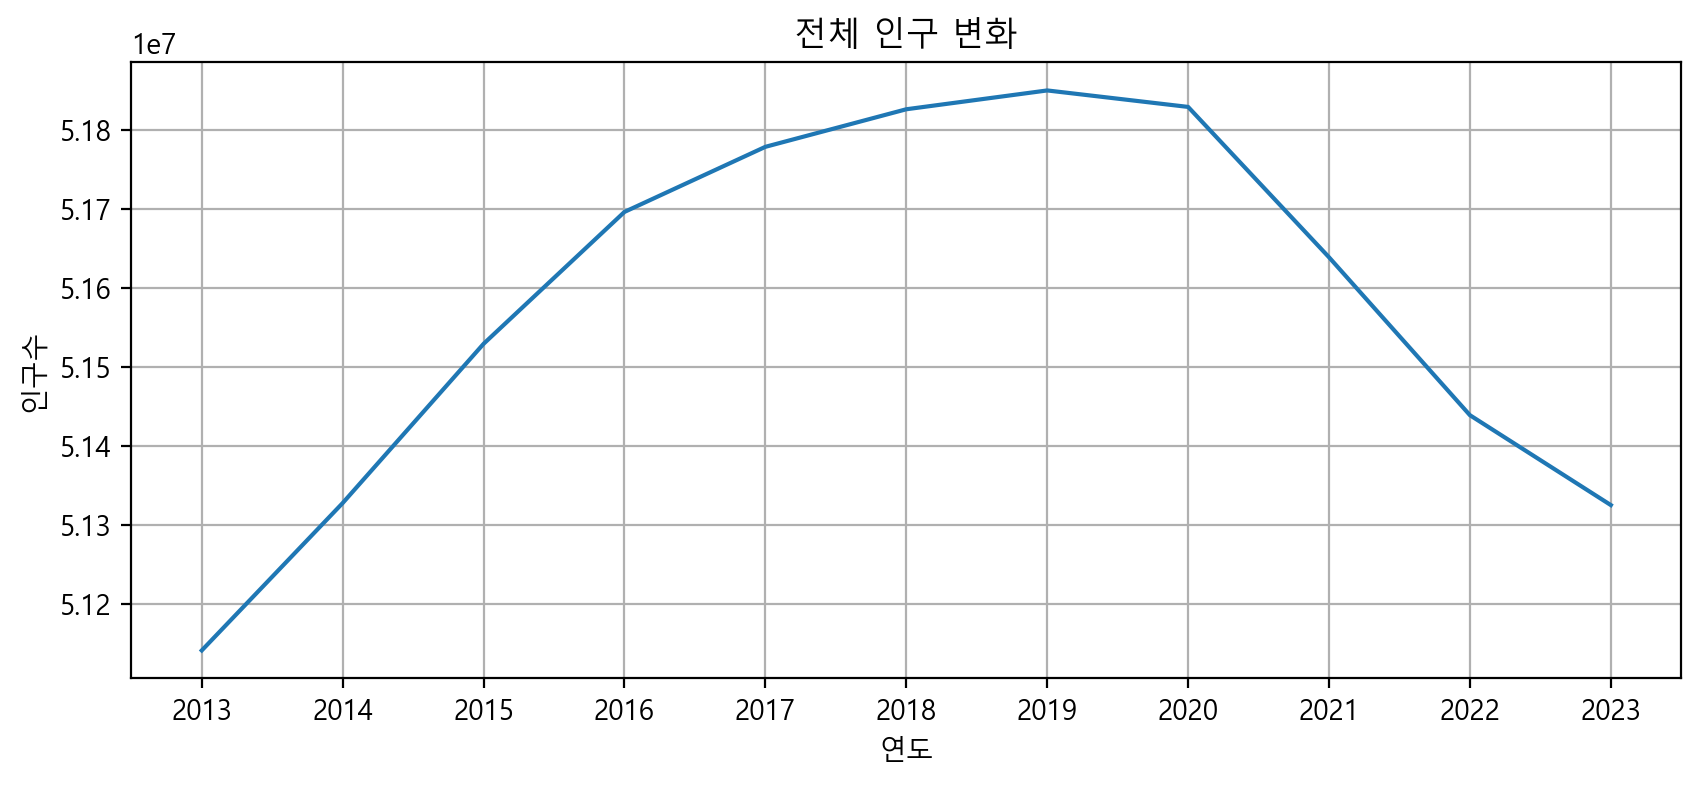

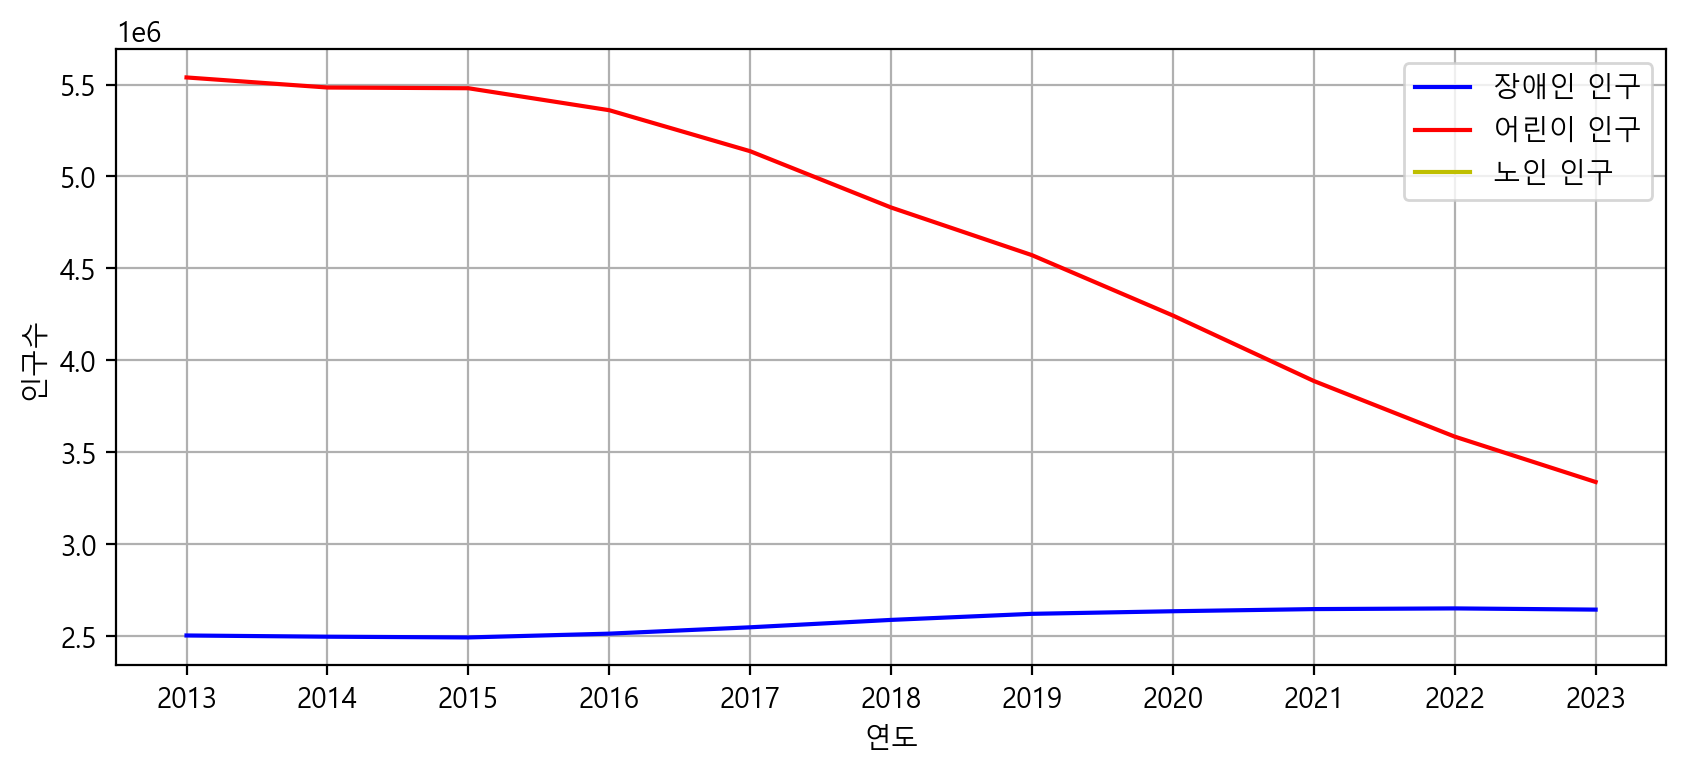

In [83]:
import csv
import matplotlib.pyplot as plt




years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.figure(figsize=(10, 4))
plt.plot(all)
plt.xticks(range(len(all)), years)  
plt.title('전체 인구 변화')
plt.xlabel('연도')
plt.ylabel('인구수')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(handicap, 'b', label='장애인 인구')
plt.plot(child, 'r', label='어린이 인구')
plt.plot(old, 'y', label='노인 인구')
plt.xticks(range(len(handicap)), years)  
plt.xlabel('연도')
plt.ylabel('인구수')
plt.legend()
plt.grid(True)
plt.show()


### 가장 최근 우리나라에서 노인, 어린이, 장애인이 차지하는 비중

### 2023년도 지역별 장애인 편의시설 설치 현황 데이터 사용

In [8]:
import csv

inst_status_pwd_2023 = []

with open('../데이터/2018_2023_시도별_장애인_편의시설_설치현황.csv', 'r', encoding='utf-8') as f:
    data = csv.reader(f)

    next(data)

    for row in data:
        row_2023 = row[0:1] + row[7:13]
        inst_status_pwd_2023.append(row_2023)
        print(row_2023)

['구분', '대상건물', '기준항목', '설치', '설치율', '적정설치', '적정설치율']
['서울', '34440', '812487', '747930', '92.1%', '682738', '84.0%']
['부산', '16320', '440244', '396768', '90.1%', '349422', '79.4%']
['대구', '8018', '263653', '237186', '90.0%', '214106', '81.2%']
['인천', '12555', '358048', '323222', '90.3%', '282107', '78.8%']
['광주', '7711', '227541', '203779', '89.6%', '178692', '78.5%']
['대전', '3945', '134611', '121277', '90.1%', '109774', '81.6%']
['울산', '2686', '92885', '84107', '90.6%', '76757', '82.6%']
['세종', '1421', '57530', '53897', '93.7%', '49854', '86.7%']
['경기', '44352', '1286189', '1172564', '91.2%', '1063908', '82.7%']
['강원', '8930', '288648', '245749', '85.1%', '213159', '73.9%']
['충북', '8028', '231005', '203961', '88.3%', '179874', '77.9%']
['충남', '11208', '343658', '303847', '88.4%', '269117', '78.3%']
['전북', '11212', '391752', '341557', '87.2%', '294994', '75.3%']
['전남', '10722', '361499', '305110', '84.4%', '258609', '71.5%']
['경북', '14782', '468721', '406321', '86.7%', '359225', '76.6%

### plt.bar()를 통한 지역별 장애인 편의시설 설치 현황 시각화

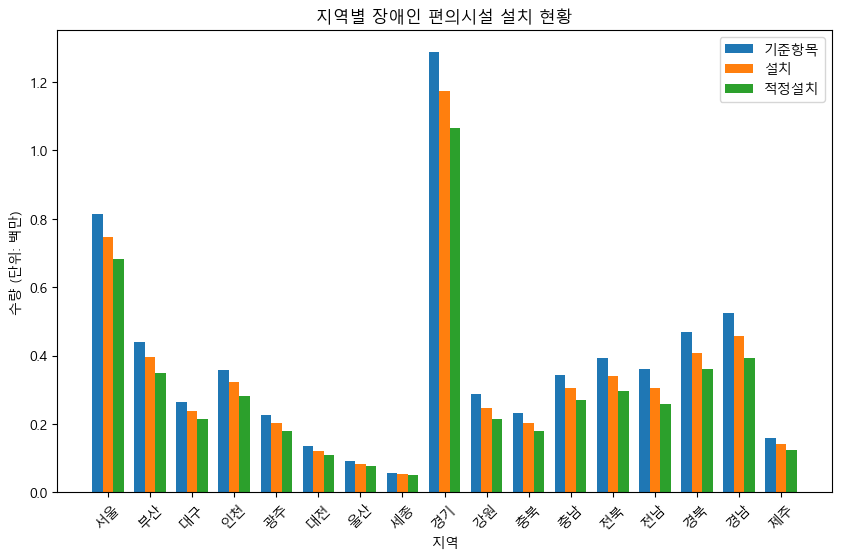

In [9]:
# 데이터 전처리
regions = [row[0] for row in inst_status_pwd_2023[1:-1]]
criteria = [int(row[2]) / 1e6 for row in inst_status_pwd_2023[1:-1]]
installations = [int(row[3]) / 1e6 for row in inst_status_pwd_2023[1:-1]]
appropriate_inst = [int(row[5]) / 1e6 for row in inst_status_pwd_2023[1:-1]]

# 바 그래프 그리기
x = np.arange(len(regions))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, criteria, width, label='기준항목')
bars2 = ax.bar(x, installations, width, label='설치')
bars3 = ax.bar(x + width, appropriate_inst, width, label='적정설치')

# 그래프에 레이블 추가
ax.set_xlabel('지역')
ax.set_ylabel('수량 (단위: 백만)')
ax.set_title('지역별 장애인 편의시설 설치 현황')
ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=45)
ax.legend()
plt.show()


- **기준항목**이란 법적 기준에 의거하여 설치해야하는 장애인 편의시설 수입니다.
- **설치**는 설치된 장애인 편의시설 수입니다.
- **적정설치**는 설치된 장애인 편의시설 중에서 법적 기준을 준수한 시설 수입니다.
- 경기 지역에 기준항목 수가 가장 많았습니다.

### sns.heatmap()을 통한 지역별 장애인 편의시설 설치율 및 적정설치율 비교

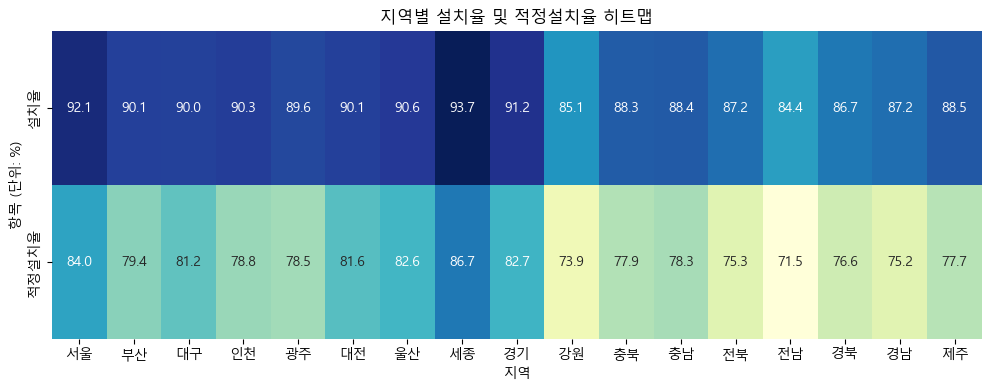

In [10]:
import seaborn as sns

inst_rate = [float(row[4].replace('%', '')) for row in inst_status_pwd_2023[1:-1]]
appropriate_inst_rate = [float(row[6].replace('%', '')) for row in inst_status_pwd_2023[1:-1]]

# 히트맵 데이터 생성
data = np.array([inst_rate, appropriate_inst_rate])
labels = ['설치율', '적정설치율']

# 히트맵 그리기
fig, ax = plt.subplots(figsize=(12, 4))

sns.heatmap(data, annot=True, fmt=".1f", cmap="YlGnBu", xticklabels=regions, yticklabels=labels, ax=ax, cbar=False)
ax.set_xlabel('지역')
ax.set_ylabel('항목 (단위: %)')
ax.set_title('지역별 설치율 및 적정설치율 히트맵')
plt.show()

- **설치율**은 기준항목 대비 설치 비율입니다.   
- **적정설치율**은 기준항목 대비 적정설치 비율로, 시설의 품질을 의미한다고 볼 수 있습니다.
- 색이 진할 수록 비율이 높아지며 색이 연할 수록 비율이 낮아집니다.
- 세종, 서울, 경기 지역에서 설치율과 적정설치율이 모두 높았으며, 전남과 강원 지역에서 설치율과 적정설치율이 모두 낮았습니다.

### plt.scatter()를 통한 지역별 장애인구 수와 편의시설 수의 관계 시각화

#### 2023년도 지역별 장애인구 수 데이터 사용

In [11]:
pwd_2023 = []

with open('../데이터/2023_장애유형별_시도별_등록장애인_수_20241130123153.csv', 'r', encoding='utf-8') as f:
    data = csv.reader(f)

    for row in data:
        row_2023 = row[1:3]
        pwd_2023.append(row_2023)
        print(row_2023)

['시도별', '합계']
['전국', '2641896']
['서울특별시', '389795']
['부산광역시', '175467']
['대구광역시', '130521']
['인천광역시', '152226']
['광주광역시', '69314']
['대전광역시', '71440']
['울산광역시', '51383']
['세종특별자치시', '12944']
['경기도', '586421']
['강원특별자치도', '100520']
['충청북도', '97117']
['충청남도', '134004']
['전북특별자치도', '130189']
['전라남도', '136472']
['경상북도', '178340']
['경상남도', '188825']
['제주특별자치도', '36918']


#### 지역별 장애인구 수 대비 편의시설 수 산점도 그리기

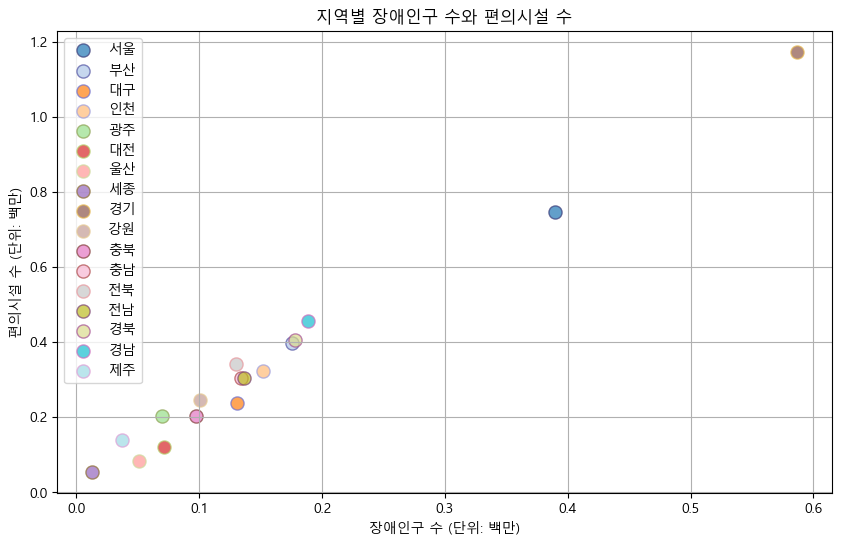

In [12]:
regions = [row[0] for row in inst_status_pwd_2023[1:-1]]
installations = [int(row[3]) / 1e6 for row in inst_status_pwd_2023[1:-1]]
population = [int(row[1]) / 1e6 for row in pwd_2023[2:]]

# 색상 지정
face_colors = plt.cm.tab20(np.linspace(0, 1, len(regions)))
edge_colors = plt.cm.tab20b(np.linspace(0, 1, len(regions)))

# 산점도 그리기
plt.figure(figsize=(10, 6))
for i, region in enumerate(regions):
    plt.scatter(population[i], installations[i], color=face_colors[i], edgecolors=edge_colors[i], label=region, alpha=0.7, s=90)

plt.xlabel('장애인구 수 (단위: 백만)')
plt.ylabel('편의시설 수 (단위: 백만)')
plt.title('지역별 장애인구 수와 편의시설 수')
plt.legend()
plt.grid(True)
plt.show()

- 서울과 경기 지역에서 장애인구 수와 편의시설 수가 모두 많았습니다.
- 평균적으로 편의시설 수는 장애인구 수보다 약 2배 정도 많았습니다.
- 편의시설 수량이 체감이 안되는 이유는 편의시설 항목 안에 시설을 구성하는 비치용품 등을 포함하고 있기 때문입니다.

### 평균 비율 선으로 장애인구 수 대비 편의시설 수가 상대적으로 많은 지역 확인

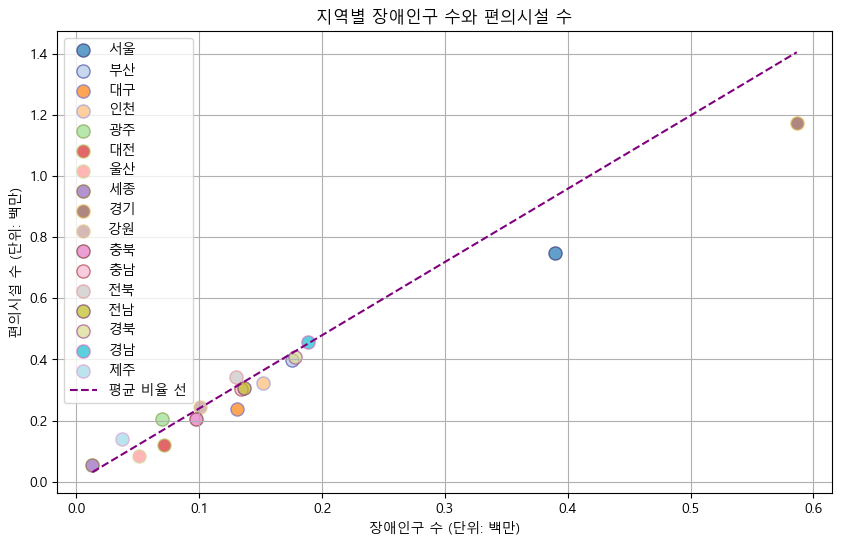

In [13]:
import numpy as np

regions = [row[0] for row in inst_status_pwd_2023[1:-1]]
installations = [int(row[3]) / 1e6 for row in inst_status_pwd_2023[1:-1]]
population = [int(row[1]) / 1e6 for row in pwd_2023[2:]]

# 색상 지정
face_colors = plt.cm.tab20(np.linspace(0, 1, len(regions)))
edge_colors = plt.cm.tab20b(np.linspace(0, 1, len(regions)))

# 산점도 그리기
plt.figure(figsize=(10, 6))
for i, region in enumerate(regions):
    plt.scatter(population[i], installations[i], color=face_colors[i], edgecolors=edge_colors[i], label=region, alpha=0.7, s=90)

# 평균 비율 계산
mean_ratio = np.mean([installations[i] / population[i] for i in range(len(regions))])
x_vals = np.linspace(min(population), max(population), 100)
y_vals = mean_ratio * x_vals
plt.plot(x_vals, y_vals, color='purple', linestyle='--', label='평균 비율 선')

plt.xlabel('장애인구 수 (단위: 백만)')
plt.ylabel('편의시설 수 (단위: 백만)')
plt.title('지역별 장애인구 수와 편의시설 수')
plt.legend()
plt.grid(True)
plt.show()


- 타 지역에 비해 상대적으로 세종, 제주, 광주, 전북 등이 장애인구 수 대비 편의시설 수가 높았습니다.
- 설치율과 적정설치율이 모두 높았던 경기와 서울의 경우, 장애인구 수 대비 편의시설 수는 상대적으로 낮았습니다.
- 장애인 편의시설은 공용시설을 포함하기 때문에 경기 또는 서울 지역에 편의시설을 늘려야 한다는 근거로 활용하기에는 한계가 있습니다.
- 결론적으로 복지 향상을 위해 더 많은 조사와 분석을 할 필요가 있습니다.

### 노인과 어린이 추가 예정